# Ridge Regression for Feature Selection in regression problems

Ridge regression is a method of without wasting any information about predictions it tries to determine variables that have exactly zero effects. Ridge regression is popular because it uses regularization for making predictions and regularization is intended to resolve the problem of overfitting. We mainly find that overfitting is where the size of data is very large and ridge regression works by **penalizing the coefficient of features** and it also **minimizes the errors in prediction.** 

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/flightdata_sample.csv")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df.head()

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Price_final,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Day,Flight_Date,Month
0,Spice Jet,DEL,BLR,Non Stop,9419.0,20,0,22,30,150,Wed,20,Jul
1,Go Air,DEL,BLR,Non Stop,9419.0,20,30,23,25,175,Wed,20,Jul
2,Air Asia,DEL,BLR,Non Stop,9419.0,8,10,10,40,150,Wed,20,Jul
3,Spice Jet,DEL,BLR,Non Stop,9419.0,6,5,8,55,170,Wed,20,Jul
4,Air Asia,DEL,BLR,Non Stop,9945.0,9,35,12,25,170,Wed,20,Jul


In [4]:
print(df.shape) # checking size of the dataset

(1875, 13)


In [5]:
df.dtypes  # checking datatypes

Flight_Name               object
Arrival_Location          object
Destination_Location      object
No of Stops               object
Price_final              float64
Arrival_time_hour          int64
Arrival_time_min           int64
Destination_time_hour      int64
Destination_time_min       int64
Durations                  int64
Day                       object
Flight_Date                int64
Month                     object
dtype: object

<AxesSubplot:>

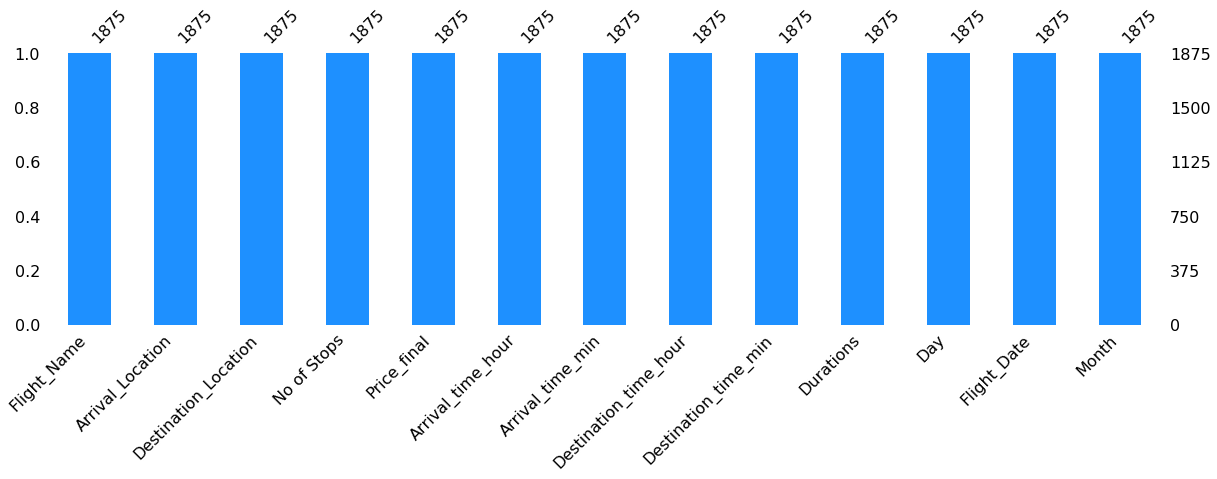

In [6]:
import missingno
missingno.bar(df, figsize = (20,5), color="dodgerblue")

In [7]:
x = df.drop('Price_final', axis = 1)
y = df['Price_final']

In [9]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

for i in x.select_dtypes(include = 'object').columns:
    x[i] = onc.fit_transform(x[i].values.reshape(-1,1))
    
x.head()

,Flight_Name,Arrival_Location,Destination_Location,No of Stops,Arrival_time_hour,Arrival_time_min,Destination_time_hour,Destination_time_min,Durations,Day,Flight_Date,Month
0,4.0,0.0,0.0,2.0,20,0,22,30,150,6.0,20,0.0
1,2.0,0.0,0.0,2.0,20,30,23,25,175,6.0,20,0.0
2,0.0,0.0,0.0,2.0,8,10,10,40,150,6.0,20,0.0
3,4.0,0.0,0.0,2.0,6,5,8,55,170,6.0,20,0.0
4,0.0,0.0,0.0,2.0,9,35,12,25,170,6.0,20,0.0


### Feature selection using Basic Ridge Regression Model

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Ridge())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':[1.0, 0.1]},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3)

search.fit(x,y)

search.best_params_

coefficients = search.best_estimator_.named_steps['model'].coef_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..........model__alpha=1.0;, score=-19927157.484 total time=   0.1s
[CV 2/5] END ...........model__alpha=1.0;, score=-8972326.008 total time=   0.0s
[CV 3/5] END ..........model__alpha=1.0;, score=-18742660.150 total time=   0.0s
[CV 4/5] END ..........model__alpha=1.0;, score=-14534551.003 total time=   0.0s
[CV 5/5] END ...........model__alpha=1.0;, score=-7789789.523 total time=   0.0s
[CV 1/5] END ..........model__alpha=0.1;, score=-19938230.905 total time=   0.0s
[CV 2/5] END ...........model__alpha=0.1;, score=-8973983.095 total time=   0.0s
[CV 3/5] END ..........model__alpha=0.1;, score=-18741473.154 total time=   0.0s
[CV 4/5] END ..........model__alpha=0.1;, score=-14536015.360 total time=   0.0s
[CV 5/5] END ...........model__alpha=0.1;, score=-7790000.995 total time=   0.0s


In [11]:
importance = np.abs(coefficients)
pd.DataFrame({'columns' : x.keys(), 'importance': importance} )

,columns,importance
0,Flight_Name,1289.380083
1,Arrival_Location,0.000000
2,Destination_Location,0.000000
3,No of Stops,79.810159
4,Arrival_time_hour,57.483622
5,Arrival_time_min,236.096063
6,Destination_time_hour,448.652184
7,Destination_time_min,74.874890
8,Durations,688.819620
9,Day,205.879532


Here we can find that **Arrival_Location, Destination_Location and Month are shows 0 (zero) importance** because they 
have **only one unique value** as per dataset. 
Because of these only one unique value, these columns dataset are not liable for model prediction.

Ridge regression penalized the coefficient of features, which are not showing importance in model building.